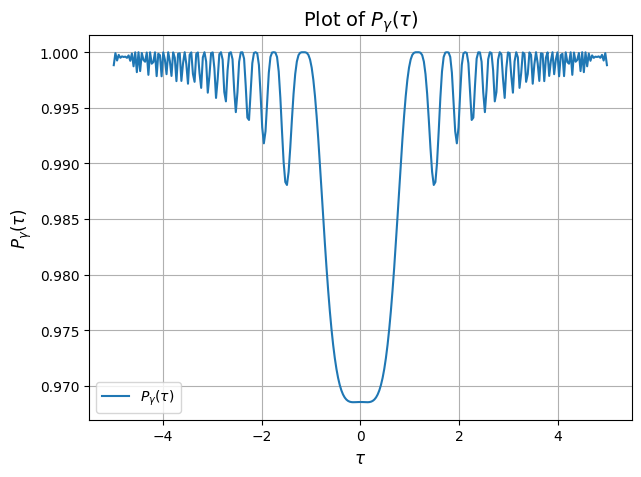

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import airy

def plot_Py_gamma(L=1.0, gamma=0.1, tau_min=-5.0, tau_max=5.0, num_points=300):
    """
    Plots P_gamma(tau) = P0(tau) / [ 1 + (2 * pi * gamma * Ai^2(-L - tau^2))^2 ]
    using the Airy function from scipy.special.airy.

    Parameters
    ----------
    L : float
        Parameter in the argument of the Airy function (-L - tau^2).
    gamma : float
        The dimensionless parameter multiplying the Airy-squared term.
    tau_min : float
        Minimum value of tau for plotting.
    tau_max : float
        Maximum value of tau for plotting.
    num_points : int
        Number of points in the tau mesh.

    Returns
    -------
    None
        A plot is shown on the screen.
    """

    # For testing, let's use P0(tau) = 1.0 (constant).
    def P0_of_tau(tau):
        return 1.0

    # Create an array of tau values.
    tau_vals = np.linspace(tau_min, tau_max, num_points)

    # Prepare an array to store P_gamma(tau).
    P_vals = np.zeros_like(tau_vals)

    for i, tau in enumerate(tau_vals):
        # Evaluate Ai(-L - tau^2). 
        # airy(...) returns (Ai, Ai', Bi, Bi'), so we take the first element.
        Ai_val, Aip_val, Bi_val, Bip_val = airy(-L - tau**2)

        # Compute P_gamma(tau) using the chosen formula:
        # P_gamma(tau) = P0(tau) / [1 + (2*pi*gamma * Ai^2)^2]
        P_vals[i] = P0_of_tau(tau) / (1.0 + (2.0 * np.pi * gamma * Ai_val**2)**2)

    # Plot the result
    plt.figure(figsize=(7,5))
    plt.plot(tau_vals, P_vals, label=r'$P_\gamma(\tau)$')
    plt.xlabel(r'$\tau$', fontsize=12)
    plt.ylabel(r'$P_\gamma(\tau)$', fontsize=12)
    plt.title(r'Plot of $P_\gamma(\tau)$', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
# plot_Py_gamma(L=1.0, gamma=0.1, tau_min=-5, tau_max=5, num_points=300)


plot_Py_gamma()

I will now Dass' analytical solution to the airy transformed

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import airy

def psihat(E, sigma, z0):
    """
    Returns the Airy-transform wavefunction hat{psi}(E) from Appendix A.2:

        hat{psi}(E)
        = sqrt(2 * pi * sigma) * exp((sigma^4 + z0 - E) / (4 * sigma^2))
          * Ai((sigma^4 + z0 - E) / sigma^2)
    """
    # airy(...) returns (Ai, Ai', Bi, Bi'), so take Ai from index [0]
    Ai_val = airy((sigma**4 + z0 - E) / sigma**2)[0]
    prefactor = np.sqrt(2.0 * np.sqrt(np.pi) * sigma)
    exponent = np.exp((sigma**4 + z0 - E) / (4.0 * sigma**2))
    return prefactor * exponent * Ai_val

def P_gamma_of_tau(tau, sigma, z0, L, gamma):
    """
    Computes:
        P_gamma(tau) = [2 tau * |psihat(L + tau^2)|^2]
                       / [1 + (2 pi gamma * Ai^2(-L - tau^2))^2].
    """
    # 1) Compute psihat(L + tau^2)
    psihat_val = psihat(L + tau**2, sigma, z0)
    # 2) Absolute value squared:
    psihat_sq = np.abs(psihat_val)**2
    # 3) Numerator = 2 * tau * |psihat|^2
    numerator = 2.0 * tau * psihat_sq
    # 4) Denominator = 1 + [2 pi gamma * Ai^2(-L - tau^2)]^2
    Ai_neg = airy(-L - tau**2)[0]  # Ai(-L - tau^2)
    denominator = 1.0 + (2.0 * np.pi * gamma * Ai_neg**2)**2
    return numerator / denominator

def plot_Py_gamma(sigma=1.0, z0=0.0, L=1.0, gamma=0.1,
                  tau_min=0.0, tau_max=5.0, num_points=300):
    """
    Plots P_gamma(tau) for tau in [tau_min, tau_max].

    Parameters
    ----------
    sigma : float
        Wavepacket width parameter (from the Gaussian initial condition).
    z0 : float
        Initial center position in the transform argument.
    L : float
        The shift in the argument, as in P_gamma(tau) with (L + tau^2) etc.
    gamma : float
        Dimensionless parameter multiplying the Ai^2 term.
    tau_min : float
        Minimum tau for the plot.
    tau_max : float
        Maximum tau for the plot.
    num_points : int
        Number of points in the tau mesh.

    Returns
    -------
    None
        Shows the plot of P_gamma(tau).
    """

    # Create a mesh of tau values
    tau_vals = np.linspace(tau_min, tau_max, num_points)

    # Compute P_gamma(tau) at each point
    P_vals = [P_gamma_of_tau(tau, sigma, z0, L, gamma) for tau in tau_vals]

    # Plot the result
    plt.figure(figsize=(7,5))
    plt.plot(tau_vals, P_vals, label=r'$P_\gamma(\tau)$')
    plt.xlabel(r'$\tau$', fontsize=12)
    plt.ylabel(r'$P_\gamma(\tau)$', fontsize=12)
    plt.title(r'Plot of $P_\gamma(\tau)$', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

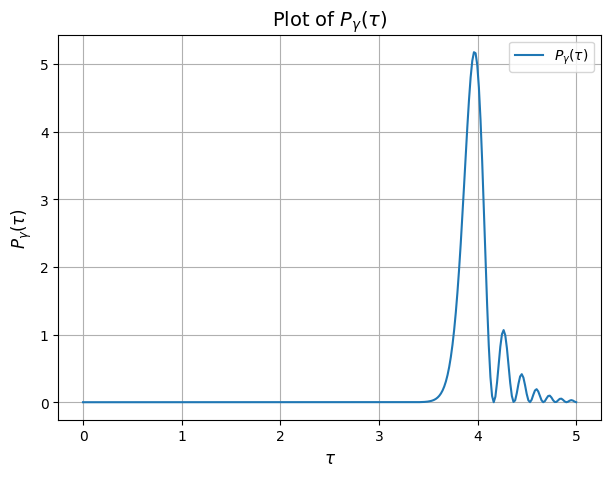

In [6]:
plot_Py_gamma(sigma=1,  z0=15.0, L=1.0, gamma=0.01, tau_min=0.0, tau_max=5.0)

# 100% correspondence with paper

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import airy

def psihat_2(E, sigma, z0):
    """
    Returns the Airy-transform wavefunction hat{psi}(E) from Siddhant Das' Appendix:

        hat{psi}(E) = sqrt(2*sigma*sqrt(pi)) *
                      exp[ 0.5 * sigma^2 * (sigma^4/6 + z0 - E) ] *
                      Ai( sigma^4/4 + z0 - E )

    Parameters
    ----------
    E : float or np.ndarray
        The energy argument (dimensionless or in chosen units).
    sigma : float
        Width parameter from the Gaussian initial wavefunction.
    z0 : float
        The initial center position (in the same units as E).

    Returns
    -------
    np.ndarray
        Value(s) of hat{psi}(E).
    """
    # Extract Ai from airy(...) = (Ai, Ai', Bi, Bi')
    Ai_val = airy(sigma**4/4 + z0 - E)[0]
    prefactor = np.sqrt(2.0 * sigma * np.sqrt(np.pi))
    exponent = np.exp(0.5 * sigma**2 * (sigma**4/6 + z0 - E))
    return prefactor * exponent * Ai_val

def P_gamma_of_tau_2(tau, sigma, z0, L, gamma):
    """
    Computes:
        P_gamma(tau) = [2 * tau * |psihat(L + tau^2)|^2]
                       / [1 + (2*pi*gamma * Ai^2(-L - tau^2))^2]

    Parameters
    ----------
    tau : float
        The variable with respect to which we plot P_gamma(tau).
    sigma : float
        Wavepacket width parameter from the Gaussian initial condition.
    z0 : float
        Initial center position in the transform argument.
    L : float
        The shift in the argument (e.g., from the problem statement).
    gamma : float
        Dimensionless parameter multiplying Ai^2 in the denominator.

    Returns
    -------
    float
        The value of P_gamma(tau).
    """
    # Evaluate hat{psi}(E = L + tau^2)
    psihat_val = psihat_2(L + tau**2, sigma, z0)
    psihat_sq = np.abs(psihat_val)**2  # magnitude squared

    # Numerator: 2 * tau * |psihat|^2
    numerator = 2.0 * tau * psihat_sq

    # Denominator: 1 + [2*pi*gamma * Ai^2(-L - tau^2)]^2
    Ai_neg = airy(-L - tau**2)[0]  # Ai(-L - tau^2)
    denominator = 1.0 + (2.0 * np.pi * gamma * Ai_neg**2)**2

    return numerator / denominator

def plot_Py_gamma_2(sigma=1.0, z0=0.0, L=1.0, gamma=0.1,
                  tau_min=0.0, tau_max=5.0, num_points=600):
    """
    Plots the function:
        P_gamma(tau) = 2 tau |psihat(L + tau^2)|^2
                       / [1 + (2 pi gamma Ai^2(-L - tau^2))^2]
    using the hat{psi}(E) given in your Appendix.

    Parameters
    ----------
    sigma : float
        Gaussian wavepacket width parameter.
    z0 : float
        Initial center position of Airy transformed wavepacket
    L : float
        Detector location at -L
    gamma : float
        Dimensionless parameter - gamma * delta
    tau_min : float
        Lower limit of tau for plotting.
    tau_max : float
        Upper limit of tau for plotting.
    num_points : int
        Number of tau values in the space.

    Returns
    -------
    None
        Displays a matplotlib plot of P_gamma(tau).
    """
    tau_vals = np.linspace(tau_min, tau_max, num_points)
    P_vals = [P_gamma_of_tau_2(t, sigma, z0, L, gamma) for t in tau_vals]

    plt.figure(figsize=(7,5))
    plt.plot(tau_vals, P_vals, 'b-', label=r'$P_\gamma(\tau)$')
    plt.xlabel(r'$\tau$', fontsize=12)
    plt.ylabel(r'$P_\gamma(\tau)$', fontsize=12)
    plt.title('Plot of $P_\\gamma(\\tau)$', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()


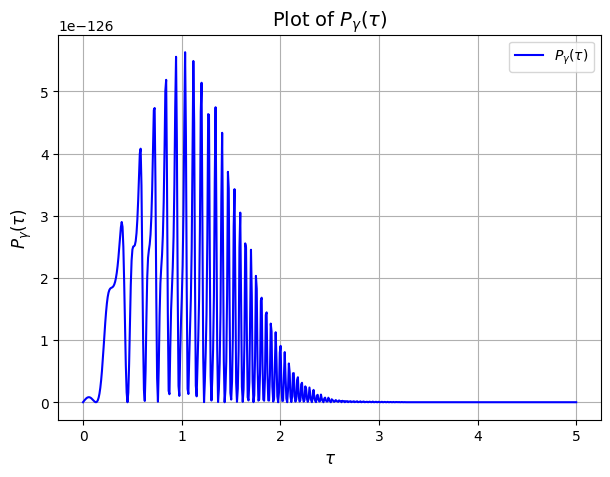

In [8]:
plot_Py_gamma_2(sigma=1,  z0=15.0, L=300.0, gamma=15, tau_min=0.0, tau_max=5.0)

Quickly try plotting with psihat2

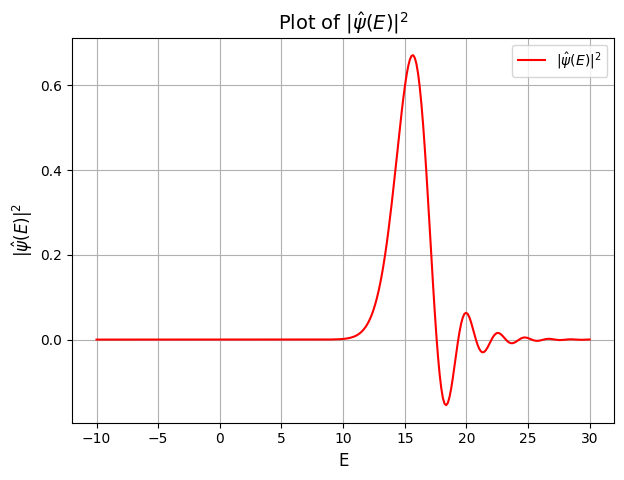

In [10]:
def plot_psihat2(sigma=1.0, z0=0.0, E_min=-10, E_max=10, num_points=300):
    """
    Plots psihat_2(E) = |hat{psi}(E)|^2 over an energy range.
    
    Parameters
    ----------
    sigma : float, optional
        Width parameter (default is 1.0).
    z0 : float, optional
        Center position parameter (default is 0.0).
    E_min : float, optional
        Minimum energy for the plot (default is -10).
    E_max : float, optional
        Maximum energy for the plot (default is 10).
    num_points : int, optional
        Number of energy points in the mesh (default is 300).
    """
    E_vals = np.linspace(E_min, E_max, num_points)
    psi2_vals = psihat_2(E_vals, sigma, z0)
    
    plt.figure(figsize=(7, 5))
    plt.plot(E_vals, psi2_vals, 'r-', label=r'$|\hat{\psi}(E)|^2$')
    plt.xlabel('E', fontsize=12)
    plt.ylabel(r'$|\hat{\psi}(E)|^2$', fontsize=12)
    plt.title(r'Plot of $|\hat{\psi}(E)|^2$', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_psihat2(sigma=1.0, z0=15.0, E_min=-10, E_max=30, num_points=300)

## Alternate perspective

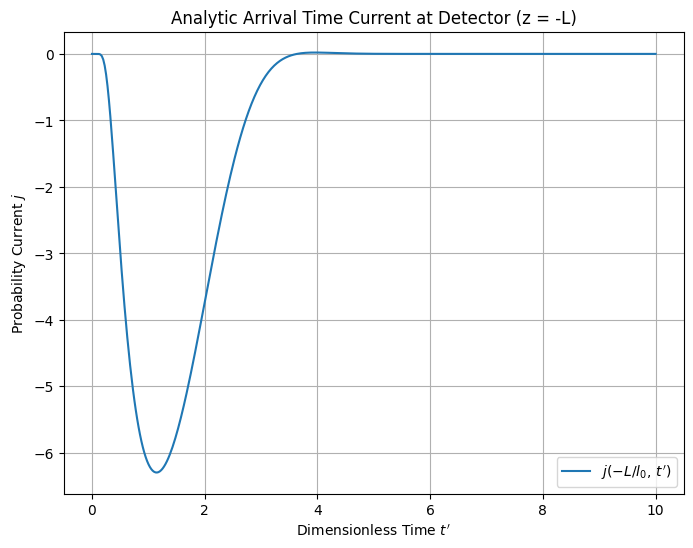

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# --- Physical constants in natural units (for simplicity) ---
# Setting ℏ = 1, m = 1, g = 1 simplifies the expressions.
hbar = 1.0
m = 1.0
g = 1.0

# --- Natural scales ---
# l0 = (ℏ^2/(2 m^2 g))^(1/3)
l0 = (hbar**2 / (2 * m**2 * g))**(1/3)
# E0 = m g l0
E0 = m * g * l0

# --- Barrier strength and detector position (physical units) ---
# For example, deltaAlpha is the barrier strength (γ) in physical units.
deltaAlpha = 10.0       # you can change this value as needed
detectorL = 2.0         # detector placed at z = -L (L > 0)

# --- Dimensionless parameters ---
# In dimensionless units: z' = z / l0, so detector position becomes Lprime = detectorL/l0.
Lprime = detectorL / l0
# Gamma prime (γ') = γ / (E0 * l0)
gammaPrime = deltaAlpha / (E0 * l0)

# --- Define the analytic probability current function ---
def j_analytic(t, gamma_prime, L_prime, prefactor=E0/l0):
    """
    Compute the analytic probability current at the detector in dimensionless time t.
    
    Parameters:
      t          : Dimensionless time t' (array-like)
      gamma_prime: Dimensionless barrier strength, γ'
      L_prime    : Dimensionless detector position, L/l0
      prefactor  : Factor E0/l0 (has the correct units for the current)
      
    Returns:
      j          : The probability current j(-L/l0, t')
    """
    # Compute the combination: (t^2/2 - L_prime)
    argument = (t**2) / 2 - L_prime
    # The prefactor from the propagator part:
    term1 = 1.0 / np.sqrt(4 * np.pi * t**3)
    # Exponential term:
    exp_term = np.exp(- (argument**2) / (4 * t))
    # The argument for the complementary error function:
    erfc_arg = argument / np.sqrt(4 * t)
    # The bracket term in the expression:
    bracket = (t**2) / 2 - L_prime - 2 * gamma_prime * erfc(erfc_arg)
    
    return prefactor * term1 * exp_term * bracket

# --- Create an array of dimensionless time values t' ---
tau_min = 1e-6  # avoid division by zero
tau_max = 10
num_points = 400
t_values = np.linspace(tau_min, tau_max, num_points)

# --- Compute the analytic probability current for each t' ---
j_values = j_analytic(t_values, gammaPrime, Lprime)

# --- Plot the result ---
plt.figure(figsize=(8, 6))
plt.plot(t_values, j_values, label=r"$j(-L/l_0,\,t')$")
plt.xlabel(r"Dimensionless Time $t'$")
plt.ylabel("Probability Current $j$")
plt.title("Analytic Arrival Time Current at Detector (z = -L)")
plt.legend()
plt.grid(True)
plt.show()
